In [1]:
from run_kinfit import run_kinfit, build_custom_hypo
from draw_funcs import draw_1d_hist, draw_1d_hists
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
input_path = '/var/kinfit/data/tr_ph_run025139.root'
output_path = 'kinfit_etapipi_etato2gamma_run025139.root'

In [3]:
build_custom_hypo('Hypo4PiVertex.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/5pi_eta_lostpi0_vertex_fit/Hypo4PiVertex_cpp.so


In [4]:
build_custom_hypo('Hypo4ChPionsLostPi0_EtaMass.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/5pi_eta_lostpi0_vertex_fit/Hypo4ChPionsLostPi0_EtaMass_cpp.so


In [5]:
run_kinfit(input_path, output_path=output_path)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run025139.root Title: 
(TrPh &) @0x7f1950a2a000


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/5pi_eta_lostpi0_vertex_fit/TrPh_C.so


In [6]:
fl = TFile.Open(output_path, 'read')

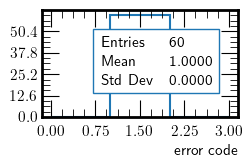

In [7]:
fl.kf_data.Draw("kf_err>>kf_err(3,0,3)", "kf_err==1", "goff")
draw_1d_hist("kf_err", xlabel='error code',
            fraction=0.47,
             info_coords=(0.3, 0.3))
plt.savefig('kf_err_4pipi0lost_eta_mass.eps')

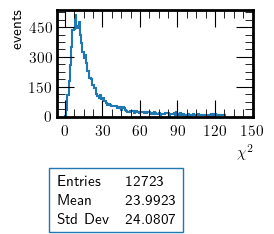

In [8]:
fl.kf_data.Draw("kf_chi2>>kf_chi2(128,0,128)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2", 
             xlabel=r'$\chi^2$',
             ylabel='events',
            fraction=0.47,
             info_coords=(0.0, -1.0),
            h_y=150, h_x=30)
plt.savefig('kf_chi2_4pipi0lost_eta_mass.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


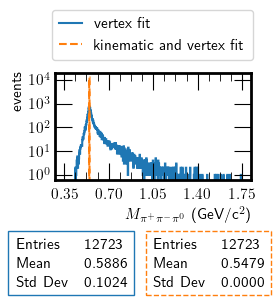

In [11]:
# fl.kf_data.Draw("in_m3pi>>in_m3pi(512,0.35,1.75)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_m3pi>>kf_m3pi(512,0.35,1.75)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx_m3pi>>kf_vtx_m3pi(512,0.35,1.75)", "kf_err==0", "goff")
draw_1d_hists([('kf_vtx_m3pi', 'vertex fit'), ('kf_m3pi', 'kinematic and vertex fit')],
              xlabel=r'$M_{\pi^+\pi^-\pi^0}$ (GeV/c$^2$)',
              ylabel='events',
              yscale='log',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
             h_x=0.35,
             y_ticks=[1., 10., 1.e+2, 1.e+3, 1.e+4])
plt.savefig('kf_m3pi_4pipi0lost_eta_mass.eps', bbox_inches='tight')

In [ ]:
# fl.Close()